# SHAP Values

Veremos brevemente un modelo de interpretabilidad para modelos complejos de machine learning como es un LGBM.

El uso de **python** para esta exploración se debe a la madurez encontrada en las librerías en mi búsqueda.

Empezamos con la carga de los módulos necesarios:

In [2]:
!pip install lightgbm

     ---------------------------------------- 1.0/1.0 MB 8.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np

import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv(r"C:\Users\Marie\Documents\MasterUBA\DMEyF/datasets/competenciaFINAL_2022.csv.gz",low_memory=False)

In [4]:
df_train.shape

(4872430, 155)

In [218]:
df_train["foto_mes"].value_counts()

202109    164935
202108    164647
202107    164348
202106    164114
202105    163768
202104    163284
202103    162900
202102    161919
202101    161342
202012    160834
202011    160072
202010    158941
202009    157519
202008    156234
202007    154772
202006    152712
202005    150267
202004    148831
202003    148313
202002    146184
202001    142929
201912    139555
201911    137523
201910    135633
201909    133419
201908    131775
201907    129853
201906    128370
201905    126763
201904    126116
201903    125622
201902    125020
201901    123916
Name: foto_mes, dtype: int64

In [285]:
164348*100/ 123916

132.62855482746377

In [219]:
df_train

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
0,31115668,201901,1,0,0,54,108,729.27,3780.07,198.76,...,1.0,0.0,NaN,NaN,3266.0,NaN,NaN,NaN,0.00,CONTINUA
1,31115678,201901,1,0,1,46,76,6899.08,19737.37,78.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONTINUA
2,31117415,201901,1,0,1,58,29,12459.45,28070.03,11366.37,...,1.0,0.0,-23800.25,0.0,842.0,16668.08,6.0,0.0,1079.16,CONTINUA
3,31117711,201901,1,0,1,44,249,7488.31,61451.81,878.92,...,1.0,0.0,-7609.38,0.0,1332.0,4780.97,5.0,0.0,997.05,CONTINUA
4,31118145,201901,1,0,1,45,168,810.22,9515.59,19.84,...,1.0,0.0,-1576.21,0.0,5111.0,1051.00,1.0,0.0,152.49,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4872425,214780008,202109,0,0,0,31,1,0.00,0.00,0.00,...,1.0,0.0,NaN,NaN,8.0,NaN,NaN,NaN,0.00,NaN
4872426,214806133,202109,1,0,0,33,1,12.30,12.30,0.00,...,8.0,0.0,NaN,NaN,17.0,NaN,NaN,NaN,0.00,NaN
4872427,214809824,202109,1,0,0,42,1,0.58,0.58,0.00,...,1.0,0.0,NaN,NaN,15.0,NaN,NaN,NaN,0.00,NaN
4872428,214822122,202109,0,0,0,37,1,0.00,0.00,0.00,...,1.0,0.0,NaN,NaN,1.0,NaN,NaN,NaN,0.00,NaN


In [220]:
df_train["clase_ternaria"].value_counts(dropna=False)

CONTINUA    4500877
NaN          328289
BAJA+1        22017
BAJA+2        21247
Name: clase_ternaria, dtype: int64

In [221]:
18857/(4176782+18857)

0.004494428619812143

In [222]:
160/12


13.333333333333334

In [223]:
df_mes_clase=pd.crosstab(df_train.foto_mes,df_train.clase_ternaria)
df_mes_clase["porc"]=df_mes_clase["BAJA+2"]/(df_mes_clase["BAJA+2"]+df_mes_clase["CONTINUA"])
#df_mes_clase=df_mes_clase [ ~df_mes_clase.index.isin([201901	,201902	,202108,202109]) ]
#df_mes_clase.to_csv(r"C:\Users\Marie\Documents\MasterUBA\DMEyF\ppt/df_mes_clase.csv")

FixedFormatter should only be used together with FixedLocator


Text(0, 0.5, '% BAJA+2')

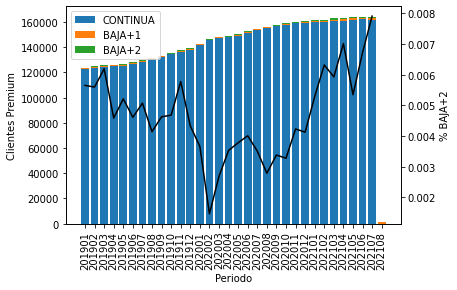

In [224]:
fig, ax1=plt.subplots()
ax1.bar(df_mes_clase.index.values.astype(str), df_mes_clase["CONTINUA"], label="CONTINUA")
ax1.bar(df_mes_clase.index.values.astype(str), df_mes_clase["BAJA+1"], bottom=df_mes_clase["CONTINUA"],label="BAJA+1")
ax1.bar(df_mes_clase.index.values.astype(str), df_mes_clase["BAJA+2"], bottom=df_mes_clase["CONTINUA"]+df_mes_clase["BAJA+1"],label="BAJA+2")
ax1.set_xticklabels(df_mes_clase.index.values.astype(str), rotation=90)
#ax1.set_ylim([120000, 170000])
ax2=ax1.twinx()
ax1.legend()
ax1.set_xlabel("Periodo")
ax1.set_ylabel("Clientes Premium")
ax2.plot(df_mes_clase.index.values.astype(str), df_mes_clase["porc"], c="black")
ax2.set_ylabel("% BAJA+2")

In [226]:
df_mes_clase=pd.crosstab(df_train.foto_mes,df_train.clase_ternaria)

df_mes_clase["BAJA0"]=df_mes_clase["BAJA+2"].shift(2)
df_mes_clase["porc"]=df_mes_clase["BAJA0"]/(df_mes_clase["BAJA0"]+df_mes_clase["CONTINUA"])
df_mes_clase=df_mes_clase [ ~df_mes_clase.index.isin([201901,201902,  202108	]) ]
df_mes_clase

clase_ternaria,BAJA+1,BAJA+2,CONTINUA,BAJA0,porc
foto_mes,,,,,
201903,700,774,124148,697.0,0.005583
201904,776,575,124765,696.0,0.005548
201905,576,658,125529,774.0,0.006128
201906,665,589,127116,575.0,0.004503
201907,595,656,128602,658.0,0.005091
201908,659,543,130573,589.0,0.004491
201909,548,615,132256,656.0,0.004936
201910,621,632,134380,543.0,0.004025
201911,634,791,136098,615.0,0.004498


In [369]:
1503*160000

240480000

FixedFormatter should only be used together with FixedLocator


Text(0, 0.5, '% BAJA')

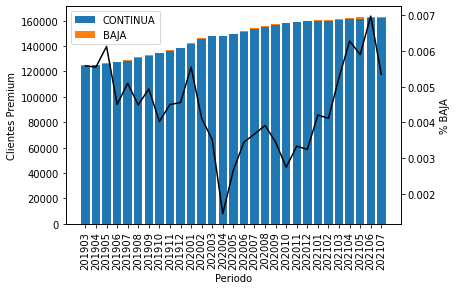

In [227]:
fig, ax1=plt.subplots()
ax1.bar(df_mes_clase.index.values.astype(str), df_mes_clase["CONTINUA"], label="CONTINUA")
ax1.bar(df_mes_clase.index.values.astype(str), df_mes_clase["BAJA0"], bottom=df_mes_clase["CONTINUA"],label="BAJA")
ax1.set_xticklabels(df_mes_clase.index.values.astype(str), rotation=90)
#ax1.set_ylim([120000, 170000])
ax2=ax1.twinx()
ax1.legend()
ax1.set_xlabel("Periodo")
ax1.set_ylabel("Clientes Premium")
ax2.plot(df_mes_clase.index.values.astype(str), df_mes_clase["porc"], c="black")
ax2.set_ylabel("% BAJA")

FixedFormatter should only be used together with FixedLocator


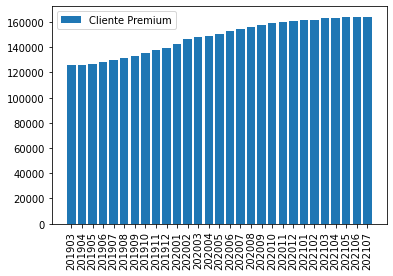

In [228]:
fig, ax1=plt.subplots()
ax1.bar(df_mes_clase.index.values.astype(str), df_mes_clase["CONTINUA"]+df_mes_clase["BAJA+1"]+df_mes_clase["BAJA+2"], label="Cliente Premium")
#ax1.bar(df_mes_clase.index.values.astype(str), df_mes_clase["BAJA0"], bottom=df_mes_clase["CONTINUA"],label="BAJA")
ax1.set_xticklabels(df_mes_clase.index.values.astype(str), rotation=90)
#ax1.set_ylim([120000, 170000])
ax1.legend()

FixedFormatter should only be used together with FixedLocator


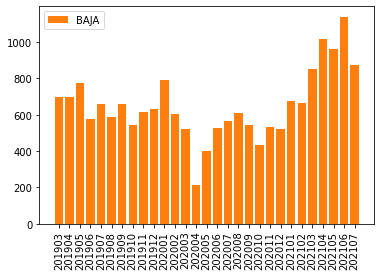

In [229]:
fig, ax1=plt.subplots()
ax1.bar(df_mes_clase.index.values.astype(str), df_mes_clase["BAJA0"], label="BAJA", color="C1")
ax1.set_xticklabels(df_mes_clase.index.values.astype(str), rotation=90)
ax1.legend()

In [140]:
df_train

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
0,31115668,201901,1,0,0,54,108,729.27,3780.07,198.76,...,1.0,0.0,NaN,NaN,3266.0,NaN,NaN,NaN,0.00,CONTINUA
1,31115678,201901,1,0,1,46,76,6899.08,19737.37,78.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONTINUA
2,31117415,201901,1,0,1,58,29,12459.45,28070.03,11366.37,...,1.0,0.0,-23800.25,0.0,842.0,16668.08,6.0,0.0,1079.16,CONTINUA
3,31117711,201901,1,0,1,44,249,7488.31,61451.81,878.92,...,1.0,0.0,-7609.38,0.0,1332.0,4780.97,5.0,0.0,997.05,CONTINUA
4,31118145,201901,1,0,1,45,168,810.22,9515.59,19.84,...,1.0,0.0,-1576.21,0.0,5111.0,1051.00,1.0,0.0,152.49,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542843,214007475,202107,0,0,0,46,1,0.00,0.00,0.00,...,3.0,0.0,NaN,NaN,3.0,NaN,NaN,NaN,0.00,NaN
4542844,214013525,202107,0,0,0,35,1,0.00,0.00,0.00,...,3.0,0.0,NaN,NaN,4.0,NaN,NaN,NaN,0.00,NaN
4542845,214027885,202107,0,0,0,37,1,0.00,0.00,0.00,...,3.0,0.0,NaN,NaN,18.0,NaN,NaN,NaN,0.00,NaN
4542846,214028073,202107,0,0,0,35,1,3.12,3.12,0.00,...,3.0,0.0,NaN,NaN,18.0,NaN,NaN,NaN,0.00,NaN


In [251]:
df_cliente_clase=pd.crosstab(df_train.numero_de_cliente,df_train.foto_mes)

#df_mes_clase["BAJA0"]=df_mes_clase["BAJA+2"].shift(2)
#df_mes_clase["porc"]=df_mes_clase["BAJA0"]/(df_mes_clase["BAJA0"]+df_mes_clase["CONTINUA"])
#df_mes_clase=df_mes_clase [ ~df_mes_clase.index.isin([201901	,201902	]) ]
df_cliente_clase

foto_mes,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,...,202012,202101,202102,202103,202104,202105,202106,202107,202108,202109
numero_de_cliente,,,,,,,,,,,,,,,,,,,,,
31115668,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
31115678,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
31117415,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
31117711,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
31118145,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214780008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
214806133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
214809824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [259]:
df_cliente_clase.index

Int64Index([ 31115668,  31115678,  31117415,  31117711,  31118145,  31118204,
             31118490,  31118757,  31118885,  31119221,
            ...
            214767385, 214769892, 214772764, 214773958, 214774363, 214780008,
            214806133, 214809824, 214822122, 214822941],
           dtype='int64', name='numero_de_cliente', length=186657)

In [252]:
df_train.foto_mes.value_counts().sort_index(ascending=False).index

Int64Index([202109, 202108, 202107, 202106, 202105, 202104, 202103, 202102,
            202101, 202012, 202011, 202010, 202009, 202008, 202007, 202006,
            202005, 202004, 202003, 202002, 202001, 201912, 201911, 201910,
            201909, 201908, 201907, 201906, 201905, 201904, 201903, 201902,
            201901],
           dtype='int64')

In [253]:
i=1
for client in df_cliente_clase.index:
    for period in df_train.foto_mes.value_counts().sort_index(ascending=False).index:
        if df_cliente_clase.loc[client,period]==0:
            i=1
        else:
            df_cliente_clase.loc[client,period]=i
            i=i+1

In [258]:
df_cliente_clase

foto_mes,201901,201902,201903,201904,201905,201906,201907,201908,201909,201910,...,202012,202101,202102,202103,202104,202105,202106,202107,202108,202109
numero_de_cliente,,,,,,,,,,,,,,,,,,,,,
31115668,33,32,31,30,29,28,27,26,25,24,...,10,9,8,7,6,5,4,3,2,1
31115678,66,65,64,63,62,61,60,59,58,57,...,43,42,41,40,39,38,37,36,35,34
31117415,99,98,97,96,95,94,93,92,91,90,...,76,75,74,73,72,71,70,69,68,67
31117711,132,131,130,129,128,127,126,125,124,123,...,109,108,107,106,105,104,103,102,101,100
31118145,165,164,163,162,161,160,159,158,157,156,...,142,141,140,139,138,137,136,135,134,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214780008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
214806133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
214809824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [277]:
clientes_baja=df_train[df_train["clase_ternaria"]=="BAJA+2"].numero_de_cliente

In [279]:
df_baja=df_train[df_train["numero_de_cliente"].isin(clientes_baja)]

In [286]:
df_baja["mesestoBAJA"]=0


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [292]:
df_baja.loc[(df_baja["numero_de_cliente"]==client) & (df_baja["foto_mes"]==period)]

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria,mesestoBAJA


In [293]:
for client in df_cliente_clase.index[df_cliente_clase.index.isin(clientes_baja)]:
    for period in df_baja.foto_mes.value_counts().sort_index(ascending=False).index:
        df_baja.loc[(df_baja["numero_de_cliente"]==client) & (df_baja["foto_mes"]==period),"mesestoBAJA"]=df_cliente_clase.loc[client,period]

In [300]:
df_baja["neg_mesestoBAJA"]=-df_baja["mesestoBAJA"]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [299]:
df_baja

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria,mesestoBAJA
6,31118490,201901,1,0,1,59,254,5323.63,41489.72,443.78,...,0.00,-4813.82,0.00,6843.0,7123.61,6.0,0.0,563.04,CONTINUA,-24
8,31118885,201901,1,0,0,70,107,2675.07,15284.26,319.90,...,0.00,-152.49,0.00,3192.0,152.49,1.0,0.0,0.00,CONTINUA,-7
25,31127797,201901,1,0,1,58,233,4523.81,34910.25,1945.85,...,0.00,-19188.77,0.00,6436.0,9426.62,7.0,0.0,1724.31,CONTINUA,-18
27,31127916,201901,1,0,1,40,253,773.89,10440.95,1731.94,...,0.00,-1852.04,0.00,4372.0,1888.41,3.0,0.0,70.38,CONTINUA,-25
52,31145612,201901,1,0,1,67,241,1548.09,14964.52,1636.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONTINUA,-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4868068,195216439,202109,1,0,0,31,24,5302.11,41432.06,2805.14,...,0.00,-26355.56,0.00,436.0,13383.05,2.0,0.0,1689.12,NaN,-1
4868611,196157013,202109,1,0,0,21,22,-1192.00,7698.21,255.30,...,90987.47,-99434.56,29.66,605.0,5429.12,3.0,0.0,10169.91,NaN,-1
4869354,198757160,202109,1,0,0,35,20,-1090.59,-9050.04,423.26,...,0.00,-9214.87,0.00,592.0,0.00,0.0,0.0,1935.45,NaN,-1
4870004,203779555,202109,1,0,0,56,16,288.88,9927.12,13.31,...,0.00,NaN,NaN,79.0,NaN,NaN,NaN,0.00,NaN,-1


In [306]:
Xbajas_clus[["numero_de_cliente", "label"]]

,numero_de_cliente,label
0,31225280,0
1,31725353,0
2,32021194,0
3,32232729,3
4,32649562,2
...,...,...
18852,206413989,3
18853,207087353,2
18854,207312577,2
18855,212659672,0


In [309]:
df_baja_clus=pd.merge(df_baja, Xbajas_clus[["numero_de_cliente", "label"]], how="left", on=["numero_de_cliente","numero_de_cliente"] ) 

In [390]:
df_baja_clus

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,mesestoBAJA,neg_mesestoBAJA,label,transacciones,consumo,prestamos,mpay,inversion,descuentos,1
0,31118490,201901,1,0,1,59,254,5323.63,41489.72,443.78,...,-24,24,1.0,15,10561.36,0.0,52234.54,376070.82,0.0,1
1,31118885,201901,1,0,0,70,107,2675.07,15284.26,319.90,...,-7,7,0.0,7,9355.37,0.0,0.00,0.00,0.0,1
2,31127797,201901,1,0,1,58,233,4523.81,34910.25,1945.85,...,-18,18,3.0,31,29105.15,0.0,0.00,0.00,0.0,1
3,31127916,201901,1,0,1,40,253,773.89,10440.95,1731.94,...,-25,25,2.0,10,12597.75,0.0,0.00,0.00,0.0,1
4,31145612,201901,1,0,1,67,241,1548.09,14964.52,1636.34,...,-18,18,3.0,0,0.00,0.0,0.00,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348281,195216439,202109,1,0,0,31,24,5302.11,41432.06,2805.14,...,-1,1,0.0,14,37526.44,0.0,0.00,0.00,0.0,1
348282,196157013,202109,1,0,0,21,22,-1192.00,7698.21,255.30,...,-1,1,1.0,16,120681.45,0.0,0.00,0.00,0.0,1
348283,198757160,202109,1,0,0,35,20,-1090.59,-9050.04,423.26,...,-1,1,0.0,17,66074.46,0.0,181228.50,0.00,0.0,1
348284,203779555,202109,1,0,0,56,16,288.88,9927.12,13.31,...,-1,1,2.0,1,2473.24,0.0,0.00,0.00,0.0,1


In [388]:
df_baja_clus["1"]=1
df_baja["1"]=1


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [424]:
df_baja_clus["pandemia"]=np.where(df_baja_clus["foto_mes"]>202003,"post","pre")

In [425]:
df_baja_clus

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,transacciones,consumo,prestamos,mpay,inversion,descuentos,1,debito_automatico,pantemia,pandemia
0,31118490,201901,1,0,1,59,254,5323.63,41489.72,443.78,...,15,10561.36,0.0,NaN,376070.82,0.0,1,3114.61,0,pre
1,31118885,201901,1,0,0,70,107,2675.07,15284.26,319.90,...,7,9355.37,0.0,NaN,0.00,0.0,1,3032.20,0,pre
2,31127797,201901,1,0,1,58,233,4523.81,34910.25,1945.85,...,31,29105.15,0.0,NaN,0.00,0.0,1,11303.79,0,pre
3,31127916,201901,1,0,1,40,253,773.89,10440.95,1731.94,...,10,12597.75,0.0,NaN,0.00,0.0,1,8583.89,0,pre
4,31145612,201901,1,0,1,67,241,1548.09,14964.52,1636.34,...,0,0.00,0.0,NaN,0.00,0.0,1,0.00,0,pre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348281,195216439,202109,1,0,0,31,24,5302.11,41432.06,2805.14,...,14,37526.44,0.0,NaN,0.00,0.0,1,7721.85,1,post
348282,196157013,202109,1,0,0,21,22,-1192.00,7698.21,255.30,...,16,120681.45,0.0,NaN,0.00,0.0,1,4374.11,1,post
348283,198757160,202109,1,0,0,35,20,-1090.59,-9050.04,423.26,...,17,66074.46,0.0,181228.5,0.00,0.0,1,69768.64,1,post
348284,203779555,202109,1,0,0,56,16,288.88,9927.12,13.31,...,1,2473.24,0.0,NaN,0.00,0.0,1,0.00,1,post


In [442]:
df_baja_postp_clus=df_baja_clus[df_baja_clus["pandemia"]=="post"]

In [459]:
df_baja_postp_clus

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,transacciones,consumo,prestamos,mpay,inversion,descuentos,1,debito_automatico,pantemia,pandemia
216249,31118490,202004,1,0,1,60,269,2558.72,85782.11,143.10,...,5,8624.31,0.0,NaN,41084.02,0.0,1,3591.44,1,post
216250,31127797,202004,1,0,1,59,248,1705.64,35901.02,2109.93,...,0,0.00,0.0,NaN,0.00,0.0,1,0.00,1,post
216251,31127916,202004,1,0,1,41,268,2727.41,41246.70,2433.88,...,8,9955.10,0.0,NaN,0.00,0.0,1,8422.13,1,post
216252,31145612,202004,1,0,0,69,256,2389.08,24664.61,2346.65,...,0,0.00,0.0,NaN,0.00,0.0,1,0.00,1,post
216253,31162765,202004,1,0,1,62,311,4677.31,64031.11,3452.36,...,50,133774.41,0.0,NaN,0.00,0.0,1,62540.16,1,post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348281,195216439,202109,1,0,0,31,24,5302.11,41432.06,2805.14,...,14,37526.44,0.0,NaN,0.00,0.0,1,7721.85,1,post
348282,196157013,202109,1,0,0,21,22,-1192.00,7698.21,255.30,...,16,120681.45,0.0,NaN,0.00,0.0,1,4374.11,1,post
348283,198757160,202109,1,0,0,35,20,-1090.59,-9050.04,423.26,...,17,66074.46,0.0,181228.5,0.00,0.0,1,69768.64,1,post
348284,203779555,202109,1,0,0,56,16,288.88,9927.12,13.31,...,1,2473.24,0.0,NaN,0.00,0.0,1,0.00,1,post


In [460]:
Xclust_postp

,label
0,1
1,0
2,1
3,0
4,0
...,...
9893,2
9894,0
9895,0
9896,1


In [463]:
Xbajas_postp

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
2001173,31226247,202004,1,0,1,60,269,1948.59,23567.45,1300.14,...,NaN,1.0,0.0,NaN,NaN,5572.0,NaN,NaN,NaN,0.00
2001248,31281783,202004,1,0,1,49,46,1191.86,12134.23,1521.95,...,0.0,1.0,0.0,-5332.51,0.0,1382.0,3055.37,5.0,0.0,293.25
2001522,31462120,202004,1,0,1,57,307,2340.78,24940.58,2278.15,...,0.0,8.0,0.0,-458.64,0.0,4881.0,518.46,1.0,0.0,0.00
2002946,32370864,202004,1,0,1,63,54,-30268.74,94433.54,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002963,32378612,202004,1,0,1,87,311,1836.61,17395.02,1769.70,...,0.0,1.0,0.0,-7277.87,0.0,8452.0,4944.69,3.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213257,206413989,202105,0,0,0,37,10,2351.40,4605.91,2249.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4213452,207087353,202105,1,0,0,32,9,1488.99,315.45,1804.68,...,0.0,5.0,0.0,-7286.67,0.0,256.0,3489.02,2.0,0.0,668.61
4213551,207312577,202105,1,0,0,39,8,-40.53,-3811.76,224.92,...,0.0,5.0,0.0,-5226.51,0.0,238.0,22169.70,1.0,0.0,3542.46
4214285,212659672,202105,0,0,0,66,2,0.00,0.00,0.00,...,NaN,5.0,0.0,NaN,NaN,47.0,NaN,NaN,NaN,0.00


In [464]:
Xbajas_clus_postp=pd.concat([Xbajas_postp.reset_index(drop=True), Xclust_postp.reset_index(drop=True)],axis=1 ) 

In [465]:
Xbajas_clus_postp

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,label
0,31226247,202004,1,0,1,60,269,1948.59,23567.45,1300.14,...,1.0,0.0,NaN,NaN,5572.0,NaN,NaN,NaN,0.00,1
1,31281783,202004,1,0,1,49,46,1191.86,12134.23,1521.95,...,1.0,0.0,-5332.51,0.0,1382.0,3055.37,5.0,0.0,293.25,0
2,31462120,202004,1,0,1,57,307,2340.78,24940.58,2278.15,...,8.0,0.0,-458.64,0.0,4881.0,518.46,1.0,0.0,0.00,1
3,32370864,202004,1,0,1,63,54,-30268.74,94433.54,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,32378612,202004,1,0,1,87,311,1836.61,17395.02,1769.70,...,1.0,0.0,-7277.87,0.0,8452.0,4944.69,3.0,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,206413989,202105,0,0,0,37,10,2351.40,4605.91,2249.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9894,207087353,202105,1,0,0,32,9,1488.99,315.45,1804.68,...,5.0,0.0,-7286.67,0.0,256.0,3489.02,2.0,0.0,668.61,0
9895,207312577,202105,1,0,0,39,8,-40.53,-3811.76,224.92,...,5.0,0.0,-5226.51,0.0,238.0,22169.70,1.0,0.0,3542.46,0
9896,212659672,202105,0,0,0,66,2,0.00,0.00,0.00,...,5.0,0.0,NaN,NaN,47.0,NaN,NaN,NaN,0.00,1


[(-12.0, 0.0)]

Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.


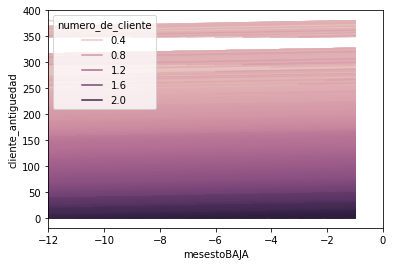

In [305]:
c="cliente_antiguedad"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))

In [ ]:
c="cliente_antiguedad"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(60, 150))

[(60.0, 159.0)]

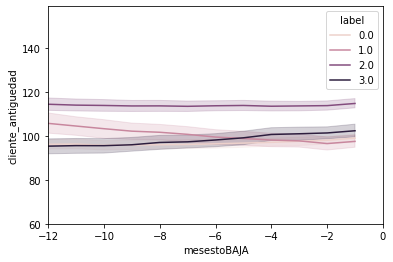

In [312]:
c="cliente_antiguedad"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(60, 150))

[(60.0, 150.0)]

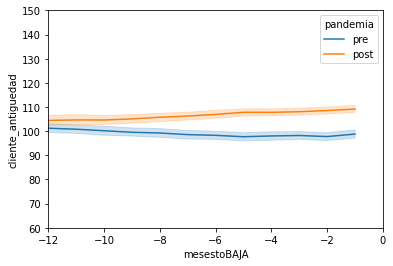

In [426]:
c="cliente_antiguedad"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="pandemia")
g.set(xlim=(-12, 0))
g.set(ylim=(60, 150))

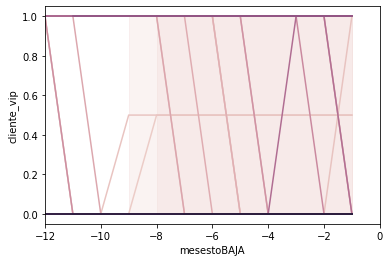

In [321]:
c="cliente_vip"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(0.0, 0.01)]

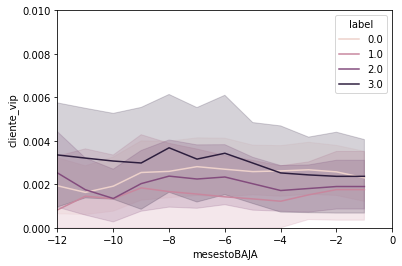

In [394]:
c="cliente_vip"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 0.01))

[(0.0, 0.01)]

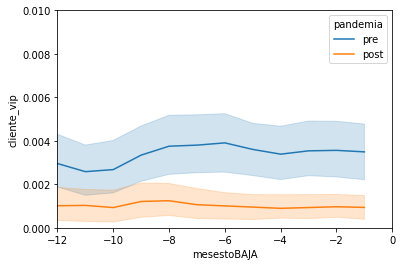

In [427]:
c="cliente_vip"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="pandemia")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 0.01))

[(-12.0, 0.0)]

Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.


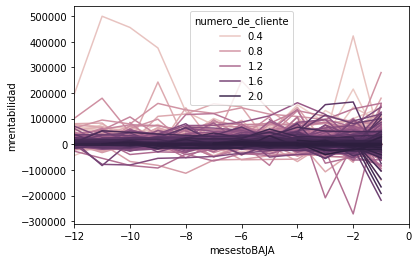

In [323]:
c="mrentabilidad"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(0.0, 5000.0)]

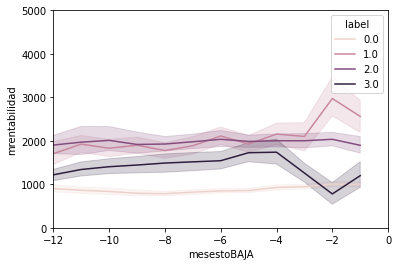

In [332]:
c="mrentabilidad"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 5000))

[(0.0, 5000.0)]

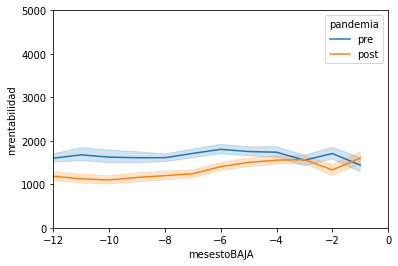

In [428]:
c="mrentabilidad"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="pandemia")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 5000))

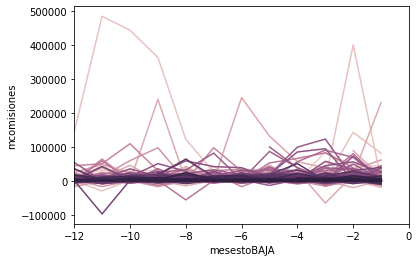

In [348]:
c="mcomisiones"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(0.0, 2000.0)]

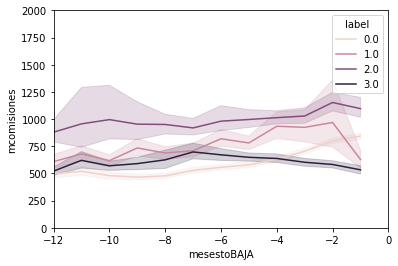

In [395]:
c="mcomisiones"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 2000))

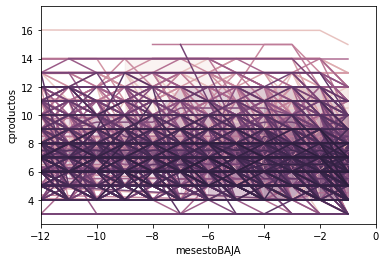

In [313]:
c="cproductos"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(4.0, 8.0)]

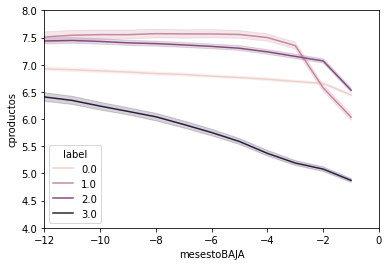

In [318]:
c="cproductos"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(4, 8))

[(4.0, 8.0)]

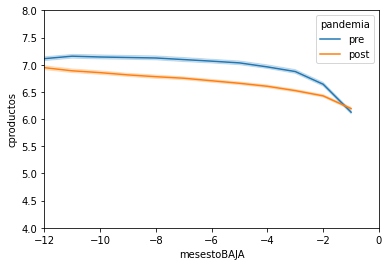

In [429]:
c="cproductos"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="pandemia")
g.set(xlim=(-12, 0))
g.set(ylim=(4, 8))

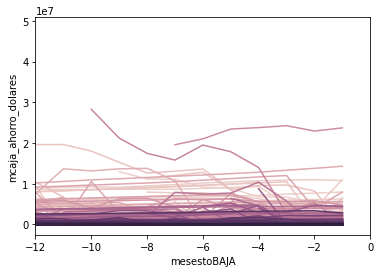

In [325]:
c="mcaja_ahorro_dolares"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(0.0, 100000.0)]

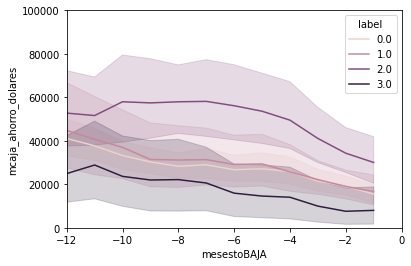

In [374]:
c="mcaja_ahorro_dolares"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 100000))

[(0.0, 100000.0)]

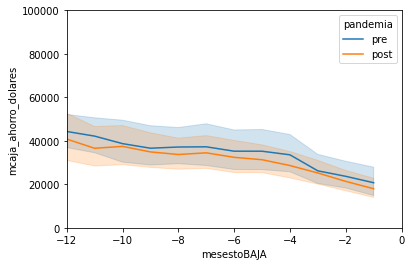

In [430]:
c="mcaja_ahorro_dolares"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="pandemia")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 100000))

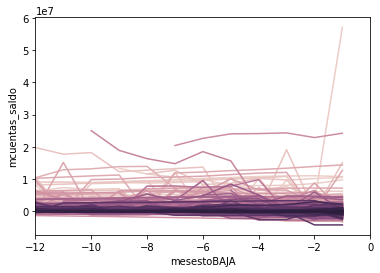

In [319]:
c="mcuentas_saldo"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(-10000.0, 100000.0)]

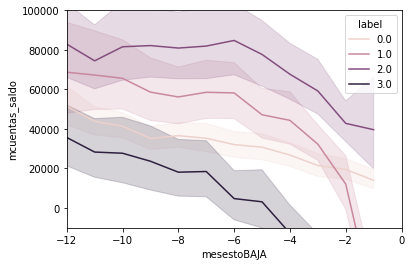

In [375]:
c="mcuentas_saldo"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(-10000, 100000))

[(-10000.0, 100000.0)]

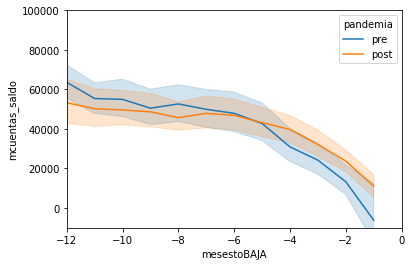

In [433]:
c="mcuentas_saldo"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="pandemia")
g.set(xlim=(-12, 0))
g.set(ylim=(-10000, 100000))

In [335]:
df_baja["transacciones"]=df_baja["ctarjeta_debito_transacciones"]+df_baja["ctarjeta_visa_transacciones"]+df_baja["ctarjeta_master_transacciones"]
df_baja_clus["transacciones"]=df_baja_clus["ctarjeta_debito_transacciones"]+df_baja_clus["ctarjeta_visa_transacciones"]+df_baja_clus["ctarjeta_master_transacciones"]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


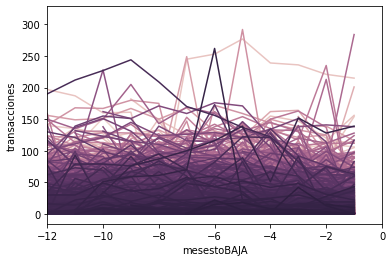

In [336]:
c="transacciones"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(0.0, 20.0)]

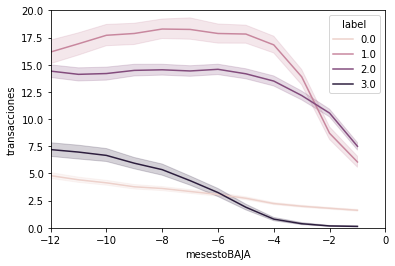

In [347]:
c="transacciones"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 20))

[(0.0, 20.0)]

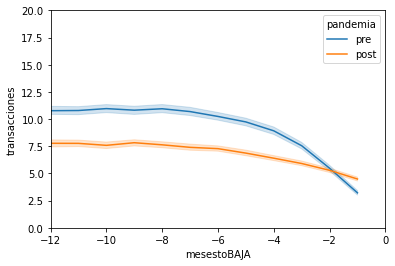

In [434]:
c="transacciones"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="pandemia")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 20))

In [379]:
df_baja["consumo"]=df_baja["mtarjeta_visa_consumo"]+df_baja["mtarjeta_master_consumo"]+df_baja["mautoservicio"]+df_baja["mtransferencias_emitidas"]
df_baja_clus["consumo"]=df_baja_clus["mtarjeta_visa_consumo"]+df_baja_clus["mtarjeta_master_consumo"]+df_baja_clus["mautoservicio"]+df_baja_clus["mtransferencias_emitidas"]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


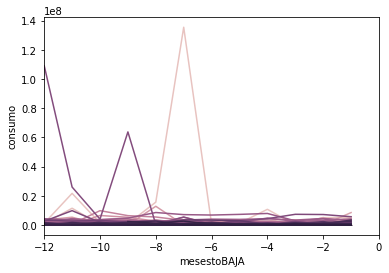

In [380]:
c="consumo"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(0.0, 80000.0)]

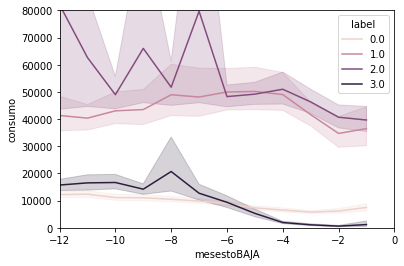

In [406]:
c="consumo"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 80000))

[(0.0, 80000.0)]

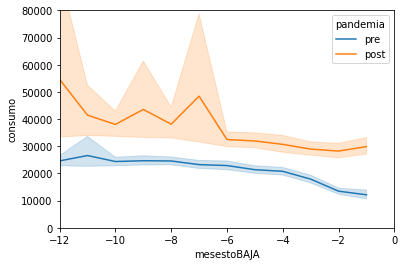

In [435]:
c="consumo"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="pandemia")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 80000))

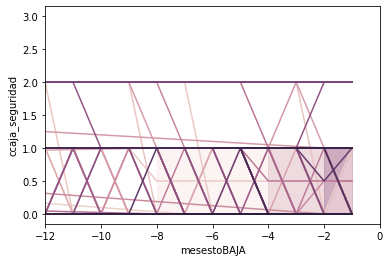

In [341]:
c="ccaja_seguridad"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(0.0, 0.05)]

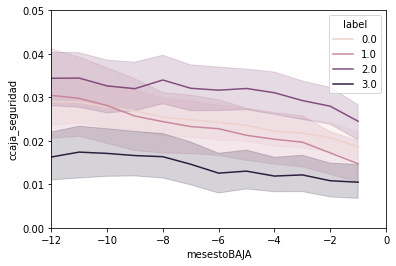

In [397]:
c="ccaja_seguridad"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 0.05))

[(0.0, 0.05)]

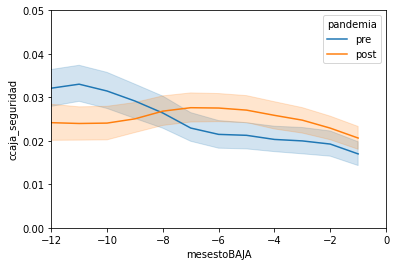

In [436]:
c="ccaja_seguridad"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="pandemia")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 0.05))

In [350]:
df_baja["prestamos"]=df_baja["mprestamos_personales"]+df_baja["mprestamos_prendarios"]+df_baja["mprestamos_hipotecarios"]
df_baja_clus["prestamos"]=df_baja_clus["mprestamos_personales"]+df_baja_clus["mprestamos_prendarios"]+df_baja_clus["mprestamos_hipotecarios"]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


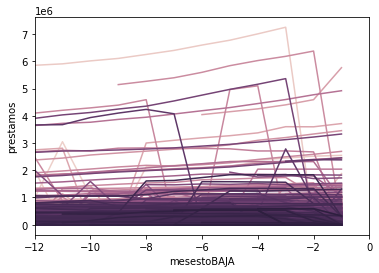

In [351]:
c="prestamos"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(0.0, 100000.0)]

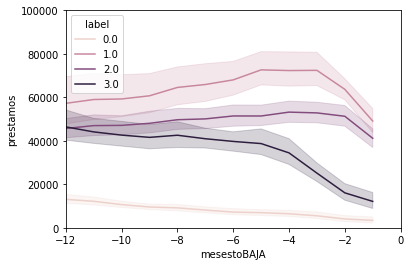

In [378]:
c="prestamos"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 100000))

[(0.0, 100000.0)]

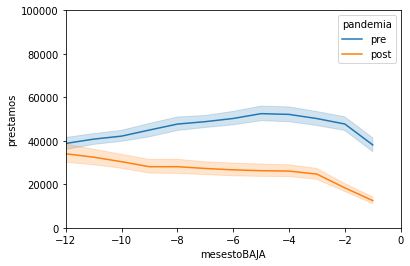

In [437]:
c="prestamos"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="pandemia")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 100000))

In [356]:
df_baja["inversion"]=df_baja["mplazo_fijo_dolares"]+df_baja["mplazo_fijo_pesos"]+df_baja["minversion1_pesos"]+df_baja["minversion1_dolares"]+df_baja["minversion2"]
df_baja_clus["inversion"]=df_baja_clus["mplazo_fijo_dolares"]+df_baja_clus["mplazo_fijo_pesos"]+df_baja_clus["minversion1_pesos"]+df_baja_clus["minversion1_dolares"]+df_baja_clus["minversion2"]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


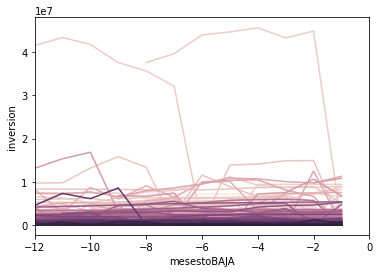

In [357]:
c="inversion"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

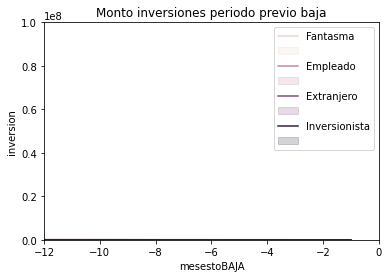

In [477]:
c="inversion"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 100000000))
plt.title("Monto inversiones periodo previo baja")
plt.legend(loc='upper right', labels=['Fantasma',"", 'Empleado',"", "Extranjero","", "Inversionista",""])
plt.show(g)

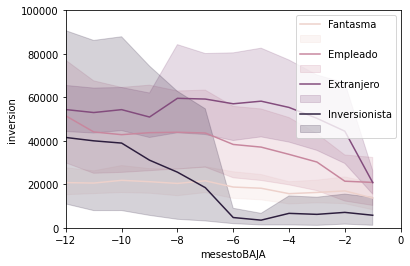

In [476]:
c="inversion"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 100000))
plt.legend(loc='upper right', labels=['Fantasma',"", 'Empleado',"", "Extranjero","", "Inversionista",""])
plt.show(g)

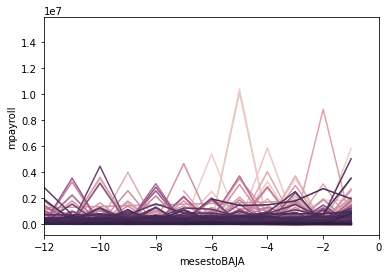

In [398]:
c="mpayroll"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(0.0, 60000.0)]

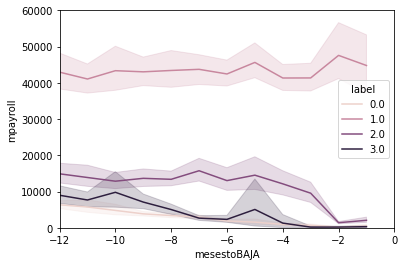

In [399]:
c="mpayroll"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 60000))

[(0.0, 60000.0)]

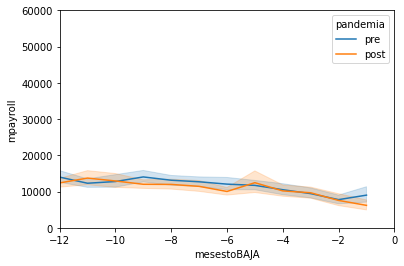

In [439]:
c="mpayroll"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="pandemia")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 60000))

In [400]:
df_baja["mpay"]=df_baja["mpayroll"]+df_baja["mpayroll2"]+df_baja["mtransferencias_recibidas"]
df_baja_clus["mpay"]=df_baja_clus["mpayroll"]+df_baja_clus["mpayroll2"]+df_baja["mtransferencias_recibidas"]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


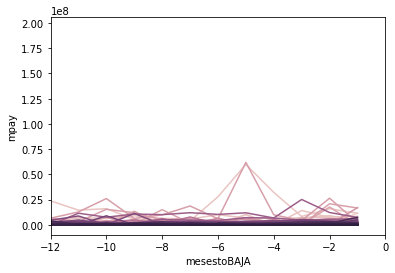

In [401]:
c="mpay"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(0.0, 60000.0)]

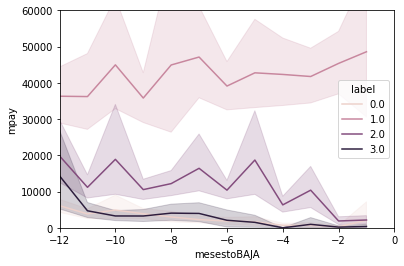

In [402]:
c="mpay"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 60000))

[(0.0, 60000.0)]

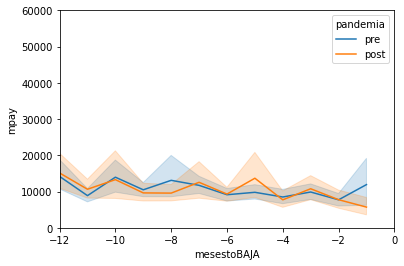

In [440]:
c="mpay"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="pandemia")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 60000))

In [408]:
lst=list(df_baja.columns)
[k for k in lst if 'master' in k]

['ctarjeta_master',
 'ctarjeta_master_transacciones',
 'mtarjeta_master_consumo',
 'ctarjeta_master_debitos_automaticos',
 'mttarjeta_master_debitos_automaticos',
 'ctarjeta_master_descuentos',
 'mtarjeta_master_descuentos']

In [409]:
df_baja["debito_automatico"]=df_baja["mcuenta_debitos_automaticos"]+df_baja["mttarjeta_visa_debitos_automaticos"]+df_baja["mttarjeta_master_debitos_automaticos"]+df_baja["mpagodeservicios"]+df_baja["mpagomiscuentas"]
df_baja_clus["debito_automatico"]=df_baja_clus["mcuenta_debitos_automaticos"]+df_baja_clus["mttarjeta_visa_debitos_automaticos"]+df_baja_clus["mttarjeta_master_debitos_automaticos"]+df_baja_clus["mpagodeservicios"]+df_baja_clus["mpagomiscuentas"]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


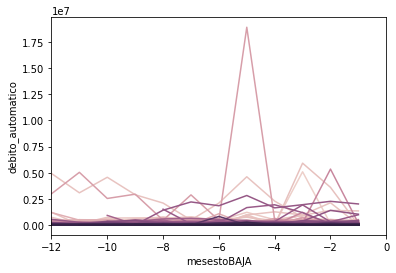

In [410]:
c="debito_automatico"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

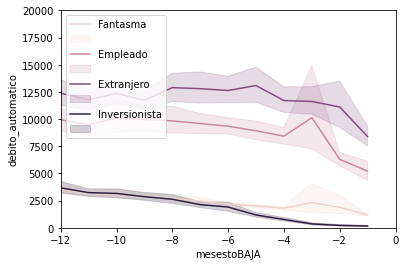

In [470]:
c="debito_automatico"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 20000))
plt.legend(title='Smoker',loc='upper left', labels=['Fantasma',"", 'Empleado',"", "Extranjero","", "Inversionista",""])
plt.show(g)

In [368]:
df_baja["descuentos"]=df_baja["mcajeros_propios_descuentos"]+df_baja["mtarjeta_visa_descuentos"]+df_baja["mtarjeta_master_descuentos"]
df_baja_clus["descuentos"]=df_baja_clus["mcajeros_propios_descuentos"]+df_baja_clus["mtarjeta_visa_descuentos"]+df_baja_clus["mtarjeta_master_descuentos"]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


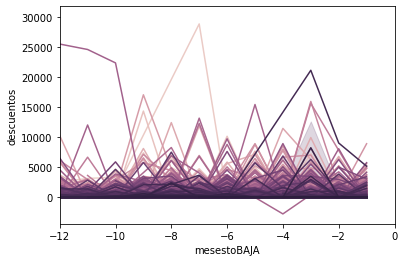

In [369]:
c="descuentos"
g=sns.lineplot(data=df_baja, x="mesestoBAJA",y=c, hue="numero_de_cliente")
g.set(xlim=(-12, 0))
g.get_legend().remove()

[(0.0, 75.0)]

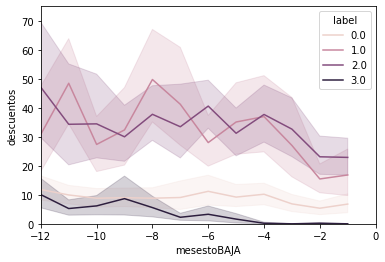

In [404]:
c="descuentos"
g=sns.lineplot(data=df_baja_clus, x="mesestoBAJA",y=c, hue="label")
g.set(xlim=(-12, 0))
g.set(ylim=(0, 75))

In [266]:
df_train[df_train["numero_de_cliente"]==	99087207]

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria,mesestoBAJA
703506,99087207,201906,1,0,0,47,142,63.56,1940.32,121.80,...,4105.50,-4105.50,0.0,3674.0,0.00,0.0,0.0,738.99,BAJA+2,0
832361,99087207,201907,1,0,0,47,143,-32.60,1921.72,54.15,...,0.00,-4105.50,0.0,3705.0,31.77,1.0,0.0,832.83,BAJA+1,0
2231840,99087207,202005,0,0,1,48,153,-2885.16,-1667.14,68.08,...,7859.10,-8211.00,0.0,4010.0,2294.01,1.0,0.0,0.00,CONTINUA,0
2382621,99087207,202006,0,0,0,48,154,0.00,0.00,0.00,...,22287.00,-7859.10,0.0,4040.0,36703.28,8.0,0.0,0.00,CONTINUA,0
2535798,99087207,202007,1,0,1,48,155,-1689.31,-5178.50,124.05,...,12316.50,-22287.00,0.0,4071.0,26063.50,9.0,0.0,0.00,CONTINUA,0
2690879,99087207,202008,1,0,1,48,156,-1758.77,-7148.21,264.83,...,4105.50,-12316.50,0.0,4102.0,16675.15,6.0,0.0,0.00,CONTINUA,0
2847377,99087207,202009,1,0,1,48,157,-1033.78,-8370.80,446.65,...,24750.30,-4105.50,0.0,4132.0,14410.01,5.0,0.0,1126.08,CONTINUA,0
3005222,99087207,202010,1,0,0,48,158,-335.44,-9131.24,2037.74,...,14076.00,-24750.30,0.0,4163.0,2294.01,1.0,0.0,1325.49,CONTINUA,0
3164365,99087207,202011,1,0,0,48,159,-5346.12,-14914.74,645.30,...,14944.02,-14076.00,0.0,4193.0,4299.83,2.0,0.0,633.42,CONTINUA,0
3324556,99087207,202012,1,0,0,48,160,-6901.96,-22150.26,16.48,...,27647.61,-14944.02,0.0,4224.0,4770.45,2.0,0.0,6533.61,BAJA+2,0


In [263]:
df_cliente_clase.loc[99087207]

foto_mes
201901    0
201902    0
201903    0
201904    0
201905    0
201906    2
201907    1
201908    0
201909    0
201910    0
201911    0
201912    0
202001    0
202002    0
202003    0
202004    0
202005    9
202006    8
202007    7
202008    6
202009    5
202010    4
202011    3
202012    2
202101    1
202102    0
202103    0
202104    0
202105    0
202106    0
202107    0
202108    0
202109    0
Name: 99087207, dtype: int64

Cargamos con **pandas** lentamente el dataset. Sólo vamos a trabajar con el primer conjunto de datos que es el más pequeño. Con un poco más de paciencia podrá usar los conjuntos más pesados. 

In [79]:
Xtrain = df_train
ytrain = Xtrain["clase_ternaria"].map(lambda x: 0 if x == "CONTINUA" else 1)

In [80]:
Xtrain

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
0,31115668,201901,1,0,0,54,108,729.27,3780.07,198.76,...,1.0,0.0,NaN,NaN,3266.0,NaN,NaN,NaN,0.00,CONTINUA
1,31115678,201901,1,0,1,46,76,6899.08,19737.37,78.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CONTINUA
2,31117415,201901,1,0,1,58,29,12459.45,28070.03,11366.37,...,1.0,0.0,-23800.25,0.0,842.0,16668.08,6.0,0.0,1079.16,CONTINUA
3,31117711,201901,1,0,1,44,249,7488.31,61451.81,878.92,...,1.0,0.0,-7609.38,0.0,1332.0,4780.97,5.0,0.0,997.05,CONTINUA
4,31118145,201901,1,0,1,45,168,810.22,9515.59,19.84,...,1.0,0.0,-1576.21,0.0,5111.0,1051.00,1.0,0.0,152.49,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4542843,214007475,202107,0,0,0,46,1,0.00,0.00,0.00,...,3.0,0.0,NaN,NaN,3.0,NaN,NaN,NaN,0.00,NaN
4542844,214013525,202107,0,0,0,35,1,0.00,0.00,0.00,...,3.0,0.0,NaN,NaN,4.0,NaN,NaN,NaN,0.00,NaN
4542845,214027885,202107,0,0,0,37,1,0.00,0.00,0.00,...,3.0,0.0,NaN,NaN,18.0,NaN,NaN,NaN,0.00,NaN
4542846,214028073,202107,0,0,0,35,1,3.12,3.12,0.00,...,3.0,0.0,NaN,NaN,18.0,NaN,NaN,NaN,0.00,NaN


Separamos también todos los casos de **BAJAS+1** y **BAJAS+2**

In [81]:
Xbajas = df_train.query("clase_ternaria == 'BAJA+2'")

In [461]:
Xbajas

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
173,31225280,201901,1,0,1,58,349,1069.88,13630.99,1048.23,...,0.0,1.0,0.0,-397.91,0.0,6433.0,251.62,3.0,0.0,164.22
898,31725353,201901,1,0,0,78,247,87.06,6465.63,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1352,32021194,201901,1,0,1,54,244,682.35,12326.52,315.18,...,0.0,1.0,0.0,-2907.89,0.0,4313.0,3760.19,2.0,0.0,234.60
1681,32232729,201901,0,0,0,90,296,753.54,4157.21,575.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2293,32649562,201901,1,0,1,84,296,2828.40,19824.60,786.73,...,0.0,1.0,0.0,-4674.58,0.0,8178.0,1416.46,3.0,0.0,70.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213257,206413989,202105,0,0,0,37,10,2351.40,4605.91,2249.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4213452,207087353,202105,1,0,0,32,9,1488.99,315.45,1804.68,...,0.0,5.0,0.0,-7286.67,0.0,256.0,3489.02,2.0,0.0,668.61
4213551,207312577,202105,1,0,0,39,8,-40.53,-3811.76,224.92,...,0.0,5.0,0.0,-5226.51,0.0,238.0,22169.70,1.0,0.0,3542.46
4214285,212659672,202105,0,0,0,66,2,0.00,0.00,0.00,...,NaN,5.0,0.0,NaN,NaN,47.0,NaN,NaN,NaN,0.00


In [37]:
Xbajas

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
173,31225280,201901,1,0,1,58,349,1069.88,13630.99,1048.23,...,0.0,1.0,0.0,-397.91,0.0,6433.0,251.62,3.0,0.0,164.22
898,31725353,201901,1,0,0,78,247,87.06,6465.63,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1352,32021194,201901,1,0,1,54,244,682.35,12326.52,315.18,...,0.0,1.0,0.0,-2907.89,0.0,4313.0,3760.19,2.0,0.0,234.60
1681,32232729,201901,0,0,0,90,296,753.54,4157.21,575.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2293,32649562,201901,1,0,1,84,296,2828.40,19824.60,786.73,...,0.0,1.0,0.0,-4674.58,0.0,8178.0,1416.46,3.0,0.0,70.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213257,206413989,202105,0,0,0,37,10,2351.40,4605.91,2249.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4213452,207087353,202105,1,0,0,32,9,1488.99,315.45,1804.68,...,0.0,5.0,0.0,-7286.67,0.0,256.0,3489.02,2.0,0.0,668.61
4213551,207312577,202105,1,0,0,39,8,-40.53,-3811.76,224.92,...,0.0,5.0,0.0,-5226.51,0.0,238.0,22169.70,1.0,0.0,3542.46
4214285,212659672,202105,0,0,0,66,2,0.00,0.00,0.00,...,NaN,5.0,0.0,NaN,NaN,47.0,NaN,NaN,NaN,0.00


In [462]:
Xbajas_postp=Xbajas[Xbajas["foto_mes"]>202003]
Xbajas_postp

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
2001173,31226247,202004,1,0,1,60,269,1948.59,23567.45,1300.14,...,NaN,1.0,0.0,NaN,NaN,5572.0,NaN,NaN,NaN,0.00
2001248,31281783,202004,1,0,1,49,46,1191.86,12134.23,1521.95,...,0.0,1.0,0.0,-5332.51,0.0,1382.0,3055.37,5.0,0.0,293.25
2001522,31462120,202004,1,0,1,57,307,2340.78,24940.58,2278.15,...,0.0,8.0,0.0,-458.64,0.0,4881.0,518.46,1.0,0.0,0.00
2002946,32370864,202004,1,0,1,63,54,-30268.74,94433.54,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002963,32378612,202004,1,0,1,87,311,1836.61,17395.02,1769.70,...,0.0,1.0,0.0,-7277.87,0.0,8452.0,4944.69,3.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4213257,206413989,202105,0,0,0,37,10,2351.40,4605.91,2249.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4213452,207087353,202105,1,0,0,32,9,1488.99,315.45,1804.68,...,0.0,5.0,0.0,-7286.67,0.0,256.0,3489.02,2.0,0.0,668.61
4213551,207312577,202105,1,0,0,39,8,-40.53,-3811.76,224.92,...,0.0,5.0,0.0,-5226.51,0.0,238.0,22169.70,1.0,0.0,3542.46
4214285,212659672,202105,0,0,0,66,2,0.00,0.00,0.00,...,NaN,5.0,0.0,NaN,NaN,47.0,NaN,NaN,NaN,0.00


Y nos deshacemos del target y limpiamos un poco la memoria.

In [451]:
Xtrain = Xtrain.drop("clase_ternaria", axis=1)
Xbajas = Xbajas.drop("clase_ternaria", axis=1)
Xbajas_postp=Xbajas_postp.drop("clase_ternaria", axis=1)
#del(df_train)

KeyError: "['clase_ternaria'] not found in axis"

Hacemos un modelo **LGBM**

In [10]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(Xtrain, ytrain)

# specify your configurations as a dict
params = {
    "boosting": "gbdt",
    'objective': 'binary',
    'learning_rate': 0.05,
    'verbose': 2,
    'max_bin': 15,
    'min_data_in_leaf': 4000,
    'verbose': 0,
}

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.217499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


Y miramos su importancia de variables

In [11]:
lgbm_importancia = pd.DataFrame({'Features': gbm.feature_name(),
                        'Importances': gbm.feature_importance()})
lgbm_importancia.sort_values(by='Importances', inplace=True, ascending=False)
lgbm_importancia.head(20)


,Features,Importances
1,foto_mes,478
33,mprestamos_personales,200
51,cpayroll_trx,198
16,mcuenta_corriente,125
18,mcaja_ahorro,122
107,ctrx_quarter,120
136,Visa_Finiciomora,113
22,mcuentas_saldo,109
17,ccaja_ahorro,81
21,cdescubierto_preacordado,79


Ahora avanzamos aplicando un modelo de interpretabilidad sobre el modelo anterior.

In [11]:
pip install shap

     -------------------------------------- 435.6/435.6 kB 5.5 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 26.2 MB/s eta 0:00:00
     --------------------------------------- 23.2/23.2 MB 26.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import shap

In [14]:
explainer = shap.TreeExplainer(gbm)
shap_values = explainer.shap_values(Xbajas)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [453]:
shap_values_bajas_postp = explainer.shap_values(Xbajas_postp)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [454]:
shap_bajas_postp = pd.DataFrame(shap_values_bajas_postp[0], columns = Xbajas_postp.columns)
shap_bajas_postp

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
0,0.0,0.798955,-0.000584,0.0,0.028430,0.002369,0.004027,-0.004713,0.025260,0.000675,...,0.0,-0.000267,0.0,-0.080765,0.0,-0.005158,0.0,-0.016943,0.0,-0.041158
1,0.0,0.838162,-0.001637,0.0,0.040550,0.001860,-0.000208,-0.006040,0.008787,-0.000410,...,0.0,-0.000447,0.0,0.022820,0.0,-0.001923,0.0,0.009253,0.0,-0.037839
2,0.0,0.760399,-0.000918,0.0,0.023303,0.001160,0.004027,-0.008102,0.026917,-0.000137,...,0.0,-0.000102,0.0,-0.068852,0.0,-0.007327,0.0,-0.013642,0.0,-0.052376
3,0.0,0.862805,-0.001654,0.0,0.010926,0.000824,0.001287,-0.010697,0.002678,-0.001248,...,0.0,0.002832,0.0,-0.134586,0.0,-0.002280,0.0,-0.030755,0.0,-0.058202
4,0.0,0.811497,-0.003742,0.0,0.012754,0.001860,0.003384,-0.006622,0.016928,-0.000390,...,0.0,-0.000447,0.0,0.026309,0.0,-0.002399,0.0,0.006688,0.0,-0.039696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9893,0.0,0.331731,0.004601,0.0,-0.032687,-0.001574,-0.015174,-0.014828,-0.034582,-0.000584,...,0.0,0.000668,0.0,-0.068110,0.0,0.011643,0.0,-0.008665,0.0,-0.033256
9894,0.0,0.337951,-0.001485,0.0,-0.063038,-0.008581,-0.022878,-0.046973,-0.111997,-0.001455,...,0.0,-0.000447,0.0,0.005920,0.0,0.026226,0.0,0.003495,0.0,-0.010500
9895,0.0,0.294812,-0.001262,0.0,-0.046412,-0.001556,-0.019809,0.008081,-0.042329,0.000461,...,0.0,-0.000447,0.0,0.021271,0.0,0.005687,0.0,-0.003230,0.0,0.026345
9896,0.0,0.368761,0.003724,0.0,-0.012249,0.001506,-0.019809,0.006823,-0.019458,0.000053,...,0.0,-0.000325,0.0,-0.017679,0.0,0.029502,0.0,-0.010429,0.0,-0.013528


Consolidamos los valores de **SHAP** para cada variable y para cada **BAJA+\***

In [16]:
shap_bajas = pd.DataFrame(shap_values[0], columns = Xbajas.columns)
shap_bajas

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
0,0.0,0.733133,-0.002746,0.0,0.026387,0.001158,0.003081,-0.003246,0.006589,0.000893,...,0.0,-0.000325,0.0,-0.072183,0.0,-0.005981,0.0,0.014825,0.0,-0.025565
1,0.0,0.547080,-0.000759,0.0,-0.032919,0.002460,0.002139,0.000420,-0.007736,-0.003117,...,0.0,0.000668,0.0,-0.092350,0.0,0.001869,0.0,-0.012005,0.0,-0.092157
2,0.0,0.793059,-0.002746,0.0,0.016995,0.002931,0.003357,0.001694,-0.003780,0.000514,...,0.0,-0.000325,0.0,0.006341,0.0,-0.002516,0.0,-0.008784,0.0,-0.014663
3,0.0,0.544614,0.005383,0.0,-0.030126,0.002460,0.002149,0.005272,-0.008884,0.004108,...,0.0,0.000668,0.0,-0.089268,0.0,-0.000401,0.0,-0.013149,0.0,-0.092628
4,0.0,0.803829,-0.000709,0.0,0.006356,0.002460,0.005281,-0.002794,0.005445,0.000147,...,0.0,-0.000447,0.0,0.001625,0.0,-0.000363,0.0,0.002190,0.0,-0.005888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18852,0.0,0.331731,0.004601,0.0,-0.032687,-0.001574,-0.015174,-0.014828,-0.034582,-0.000584,...,0.0,0.000668,0.0,-0.068110,0.0,0.011643,0.0,-0.008665,0.0,-0.033256
18853,0.0,0.337951,-0.001485,0.0,-0.063038,-0.008581,-0.022878,-0.046973,-0.111997,-0.001455,...,0.0,-0.000447,0.0,0.005920,0.0,0.026226,0.0,0.003495,0.0,-0.010500
18854,0.0,0.294812,-0.001262,0.0,-0.046412,-0.001556,-0.019809,0.008081,-0.042329,0.000461,...,0.0,-0.000447,0.0,0.021271,0.0,0.005687,0.0,-0.003230,0.0,0.026345
18855,0.0,0.368761,0.003724,0.0,-0.012249,0.001506,-0.019809,0.006823,-0.019458,0.000053,...,0.0,-0.000325,0.0,-0.017679,0.0,0.029502,0.0,-0.010429,0.0,-0.013528


Y consolidamos sus importancias

In [ ]:
shap_importancias = shap_bajas.mean().abs().sort_values(ascending=False)
shap_importancias.head(20)

ctrx_quarter                   0.925182
foto_mes                       0.459926
cpayroll_trx                   0.396307
mcaja_ahorro                   0.251205
mprestamos_personales          0.146724
mcuentas_saldo                 0.139081
mtarjeta_visa_consumo          0.133523
ctarjeta_visa                  0.071905
ctarjeta_visa_transacciones    0.069685
Visa_msaldototal               0.068130
mpayroll                       0.055903
mcuenta_corriente              0.055431
cproductos                     0.041427
Master_fultimo_cierre          0.035554
Visa_fultimo_cierre            0.035437
mcomisiones_mantenimiento      0.035210
cdescubierto_preacordado       0.035122
Visa_status                    0.032645
Visa_mpagospesos               0.025620
Visa_mpagominimo               0.021906
dtype: float64

La librería nos da útiles herramientas para vizualizar la info anterior

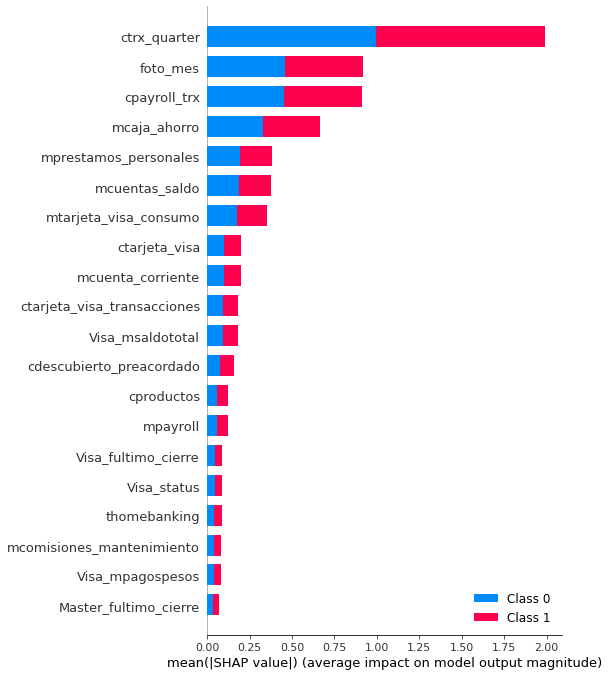

In [ ]:
shap.summary_plot(shap_values, Xbajas)


In [178]:
mas_import=["foto_mes","Visa_fultimo_cierre","cpayroll_trx","mprestamos_personales","mcaja_ahorro","ctrx_quarter",
"Master_fultimo_cierre","mcuentas_saldo","mcuenta_corriente","mtarjeta_visa_consumo","cdescubierto_preacordado",
"ctarjeta_visa","Visa_status","Visa_mpagominimo","Visa_msaldototal","Visa_mpagospesos","ctarjeta_visa_transacciones"]


In [ ]:
for c in mas_import:
   # shap.dependence_plot(c, shap_values[0], Xbajas)

Y ahora debemos empezar a jugar para entender como estan asociadas las variables a los **shap values**

¿Se podrá hacer una clusterización sobre los valores de shap? 

Como la cantidad de variables es muy alto, es conveniente hacer un embedding con **UMAP**. Como la estrutura de los **shap values** se pueden hacer sin mucho preprocesamiento.

In [27]:
pip install umap-learn

     ---------------------------------------- 88.2/88.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82814 sha256=3b60f124c3324f446cfaafd5ab7bb8c6c3c0f367cd4b68e4c7d55f3338d0c1b2
  Stored in directory: c:\users\marie\appdata\local\pip\cache\wheels\a0\e8\c6\a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55496 sha256=f23ba1f288206d42501f3280dad47726ddcb1bcbf170178685aadd2ea50dbde6
  Stored in directory: c:\users\marie\appdata\local\pip\cache\wheels\f8\5c\b4\a06301605095861524c1c7268a0d445b3a4c50292ce3bec24c
Successfully built umap-learn pynndescent
Note: you may need 


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
from umap import UMAP
import matplotlib.pyplot as plt


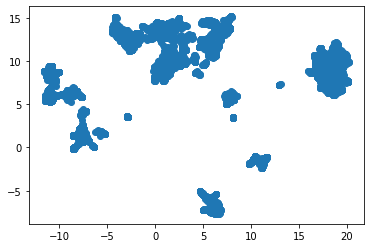

In [455]:
embedding_2d = UMAP(
  n_components=2, n_neighbors=40
).fit_transform(shap_bajas_postp)
plt.scatter(embedding_2d[:,0], embedding_2d[:,1])

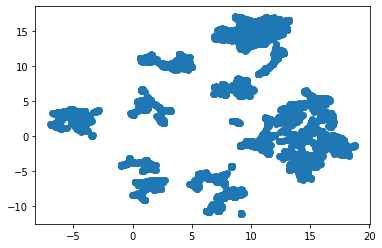

In [26]:
embedding_2d = UMAP(
  n_components=2, n_neighbors=40
).fit_transform(shap_bajas)
plt.scatter(embedding_2d[:,0], embedding_2d[:,1])

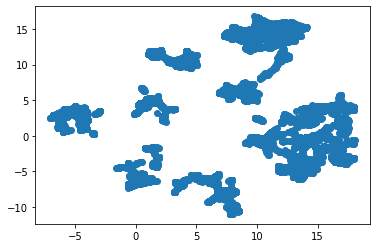

In [25]:
embedding_2d = UMAP(
  n_components=2, n_neighbors=40
).fit_transform(shap_bajas)
plt.scatter(embedding_2d[:,0], embedding_2d[:,1])

In [182]:
embedding_2d

array([[ -3.8567765,   3.807951 ],
       [ 11.8042345,  -0.8896027],
       [  5.800599 , -10.079274 ],
       ...,
       [  6.6396604,  10.514403 ],
       [  6.8140492,  12.50768  ],
       [  5.918158 ,  -8.875749 ]], dtype=float32)

Su momento de brillar: Qué se puede hacer desde este punto para tratar de interpretar los distintos segmentos para la presentación de Miranda.

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#scaler = StandardScaler()
#scaled_features = scaler.fit_transform(features)

In [85]:
kmeans = KMeans(
        init="k-means++",
         n_clusters=4,
         n_init=10,
         max_iter=300
     )

In [456]:
kmeans.fit(embedding_2d)

KMeans(n_clusters=4)

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:>

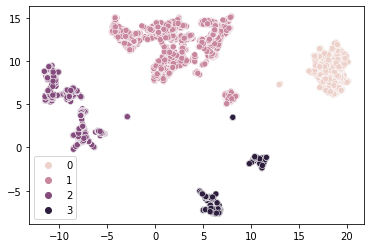

In [457]:
sns.scatterplot(embedding_2d[:,0], embedding_2d[:,1], hue=kmeans.labels_ )

In [53]:
Xbajas.shape

(18857, 154)

In [302]:
Xclust=pd.DataFrame(kmeans.labels_,columns = ['label'])
Xclust.shape


(18857, 1)

In [458]:
Xclust_postp=pd.DataFrame(kmeans.labels_,columns = ['label'])
Xclust_postp.shape


(9898, 1)

In [63]:
Xbajas_clus=pd.concat([Xbajas.reset_index(drop=True), Xclust.reset_index(drop=True)],axis=1 ) 

In [117]:
Xbajas_clus

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,label
0,31225280,201901,1,0,1,58,349,1069.88,13630.99,1048.23,...,1.0,0.0,-397.91,0.0,6433.0,251.62,3.0,0.0,164.22,0
1,31725353,201901,1,0,0,78,247,87.06,6465.63,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,32021194,201901,1,0,1,54,244,682.35,12326.52,315.18,...,1.0,0.0,-2907.89,0.0,4313.0,3760.19,2.0,0.0,234.60,0
3,32232729,201901,0,0,0,90,296,753.54,4157.21,575.69,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,32649562,201901,1,0,1,84,296,2828.40,19824.60,786.73,...,1.0,0.0,-4674.58,0.0,8178.0,1416.46,3.0,0.0,70.38,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18852,206413989,202105,0,0,0,37,10,2351.40,4605.91,2249.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
18853,207087353,202105,1,0,0,32,9,1488.99,315.45,1804.68,...,5.0,0.0,-7286.67,0.0,256.0,3489.02,2.0,0.0,668.61,2
18854,207312577,202105,1,0,0,39,8,-40.53,-3811.76,224.92,...,5.0,0.0,-5226.51,0.0,238.0,22169.70,1.0,0.0,3542.46,2
18855,212659672,202105,0,0,0,66,2,0.00,0.00,0.00,...,5.0,0.0,NaN,NaN,47.0,NaN,NaN,NaN,0.00,0


In [120]:
Xbajas_clus[Xbajas_clus.numero_de_cliente == 163894175 ]

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,label
7146,163894175,201911,1,0,1,26,33,1720.87,13989.78,3890.93,...,3.0,0.0,-46973.05,7.1,977.0,165502.03,40.0,0.0,7917.75,2
15744,163894175,202102,1,0,0,27,48,-980.17,-9887.95,106.95,...,-3.0,0.0,-38971.84,0.0,228.0,22287.75,13.0,0.0,2592.33,2


In [126]:
df_train[df_train.numero_de_cliente == 99087207 ]

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
703506,99087207,201906,1,0,0,47,142,63.56,1940.32,121.80,...,25.0,4105.50,-4105.50,0.0,3674.0,0.00,0.0,0.0,738.99,BAJA+2
832361,99087207,201907,1,0,0,47,143,-32.60,1921.72,54.15,...,21.0,0.00,-4105.50,0.0,3705.0,31.77,1.0,0.0,832.83,BAJA+1
2231840,99087207,202005,0,0,1,48,153,-2885.16,-1667.14,68.08,...,25.0,7859.10,-8211.00,0.0,4010.0,2294.01,1.0,0.0,0.00,CONTINUA
2382621,99087207,202006,0,0,0,48,154,0.00,0.00,0.00,...,20.0,22287.00,-7859.10,0.0,4040.0,36703.28,8.0,0.0,0.00,CONTINUA
2535798,99087207,202007,1,0,1,48,155,-1689.31,-5178.50,124.05,...,24.0,12316.50,-22287.00,0.0,4071.0,26063.50,9.0,0.0,0.00,CONTINUA
2690879,99087207,202008,1,0,1,48,156,-1758.77,-7148.21,264.83,...,26.0,4105.50,-12316.50,0.0,4102.0,16675.15,6.0,0.0,0.00,CONTINUA
2847377,99087207,202009,1,0,1,48,157,-1033.78,-8370.80,446.65,...,21.0,24750.30,-4105.50,0.0,4132.0,14410.01,5.0,0.0,1126.08,CONTINUA
3005222,99087207,202010,1,0,0,48,158,-335.44,-9131.24,2037.74,...,24.0,14076.00,-24750.30,0.0,4163.0,2294.01,1.0,0.0,1325.49,CONTINUA
3164365,99087207,202011,1,0,0,48,159,-5346.12,-14914.74,645.30,...,26.0,14944.02,-14076.00,0.0,4193.0,4299.83,2.0,0.0,633.42,CONTINUA
3324556,99087207,202012,1,0,0,48,160,-6901.96,-22150.26,16.48,...,22.0,27647.61,-14944.02,0.0,4224.0,4770.45,2.0,0.0,6533.61,BAJA+2


In [130]:
Xbajas_clus.numero_de_cliente.value_counts().head(30)

163894175    2
99087207     2
77702607     2
45709012     2
133732211    2
38302447     2
73555755     2
193012873    2
41131510     2
82520829     2
128281545    2
102238453    2
109660573    2
151291194    2
110061140    2
33808471     2
67553219     2
122873574    2
132892693    2
37325011     2
56403686     2
184496243    2
176182592    2
145456343    2
84812048     2
154222940    2
124490383    2
152292071    1
151938630    1
146854758    1
Name: numero_de_cliente, dtype: int64

In [133]:
rec=Xbajas_clus.numero_de_cliente.value_counts().index[0:27]

In [139]:
Xbajas_clus[Xbajas_clus.numero_de_cliente.isin(rec)].label.value_counts()

0    29
2    15
3     5
1     5
Name: label, dtype: int64

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:>

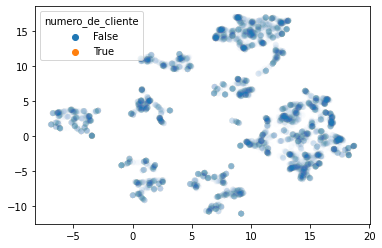

In [137]:
sns.scatterplot(embedding_2d[:,0], embedding_2d[:,1], hue=Xbajas_clus.numero_de_cliente.isin(rec), alpha=0.01)

In [65]:
Xbajas_clus.label.value_counts()

0    7328
2    5758
3    2949
1    2822
Name: label, dtype: int64

In [67]:

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (Xbajas_clus.groupby("label").agg( ['mean','std']))

      numero_de_cliente                     foto_mes             \
                   mean           std           mean        std   
label                                                             
0          1.079725e+08  4.418732e+07  202001.701419  76.672601   
1          1.115444e+08  4.278860e+07  201963.392629  75.166942   
2          1.036857e+08  4.196758e+07  201982.250782  81.073671   
3          1.119363e+08  4.350238e+07  202000.766701  77.931239   

      active_quarter           cliente_vip            internet            \
                mean       std        mean       std      mean       std   
label                                                                      
0           0.762418  0.425631    0.002456  0.049504  0.329558  0.480423   
1           0.930191  0.254869    0.001772  0.042063  0.544295  0.514919   
2           0.977770  0.147443    0.001910  0.043670  0.500695  0.516111   
3           0.590031  0.491911    0.002374  0.048671  0.265175  0.468344  

(0.06864385053322486, 1.5840050331704396)

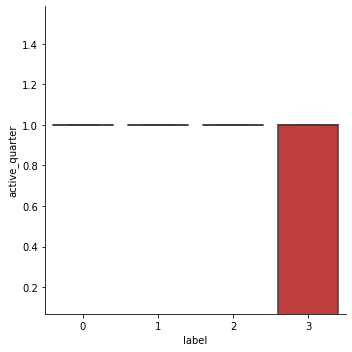

In [99]:
c="active_quarter"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])




(-0.09098467093994693, 0.09533318873174838)

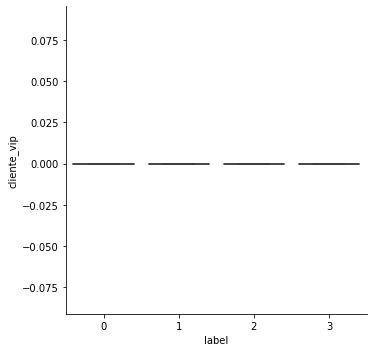

In [100]:
c="cliente_vip"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])




(19.676065166775807, 75.38051859522238)

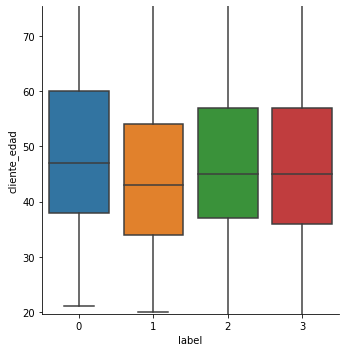

In [101]:
c="cliente_edad"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])



(-57.45575679700892, 264.16138335478587)

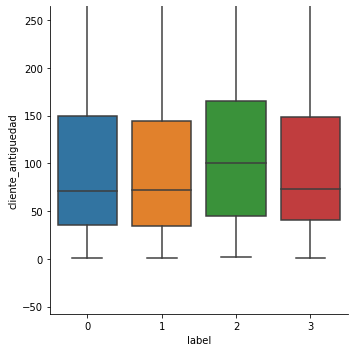

In [102]:
c="cliente_antiguedad"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-11660.807744675622, 14825.873854873425)

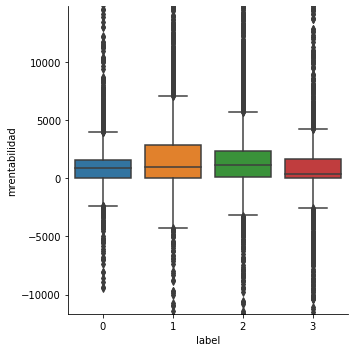

In [103]:
c="mrentabilidad"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-61783.11879205898, 94580.64124844121)

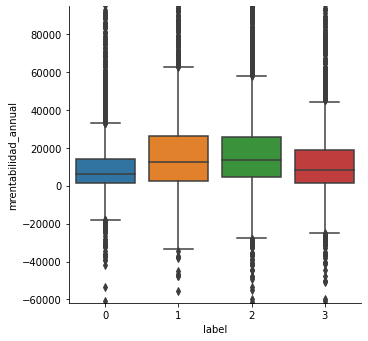

In [104]:
c="mrentabilidad_annual"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


In [ ]:
c="mcomisiones"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


In [ ]:
c="mactivos_margen"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


In [ ]:
c="mpasivos_margen"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(3.537252504470106, 9.503528107504227)

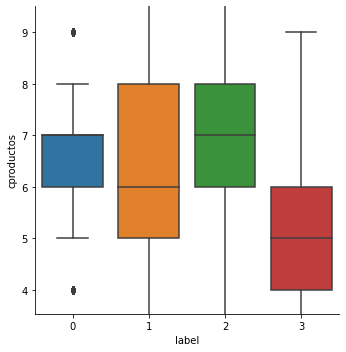

In [107]:
c="cproductos"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(0.760372878838432, 1.2730364651717498)

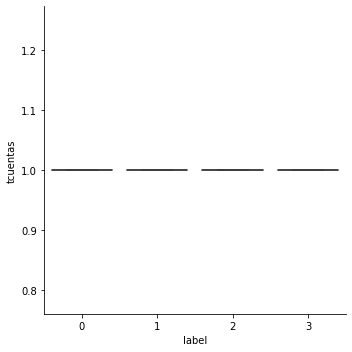

In [108]:
c="tcuentas"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-211552.39425713866, 183545.5530130383)

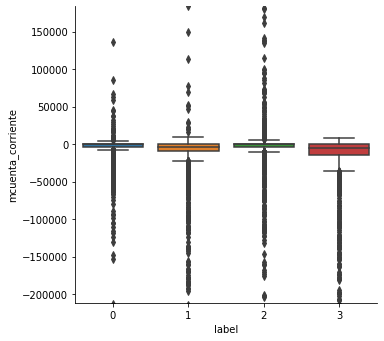

In [109]:
c="mcuenta_corriente"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


In [ ]:
c="mcuenta_corriente_adicional"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-154506.98428896168, 177097.97282690514)

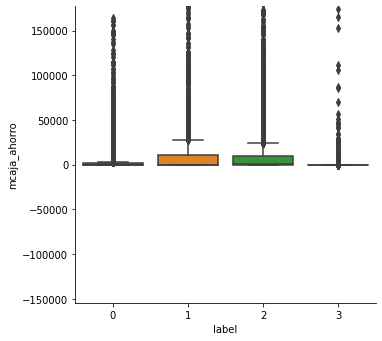

In [111]:
c="mcaja_ahorro"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-550713.2000249212, 594776.211299249)

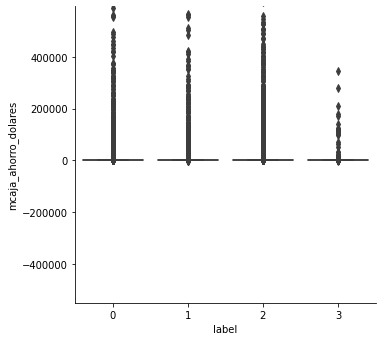

In [112]:
c="mcaja_ahorro_dolares"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-0.04344202052611967, 1.6077417500695252)

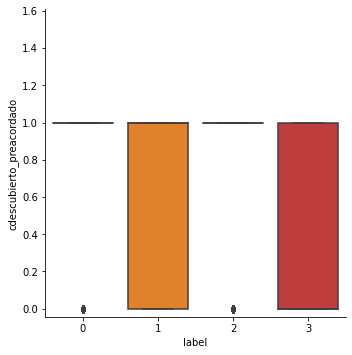

In [113]:
c="cdescubierto_preacordado"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-651518.0222168497, 686243.5312384332)

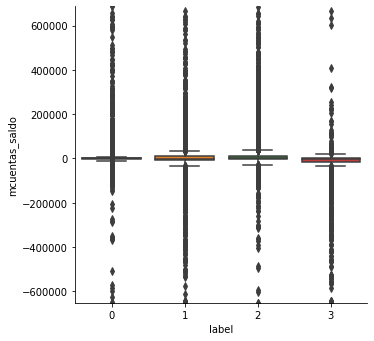

In [114]:
c="mcuentas_saldo"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-7.910152677750209, 10.54832417904946)

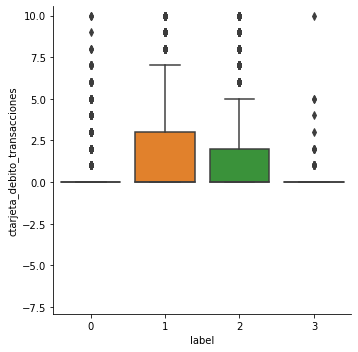

In [115]:
c="ctarjeta_debito_transacciones"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-7882.152240760246, 8281.483311450176)

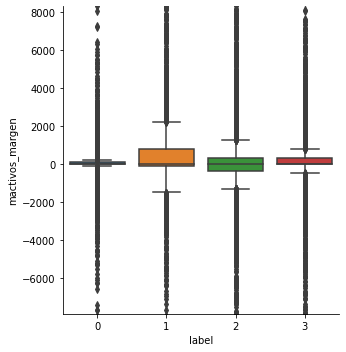

In [ ]:
c="mactivos_margen"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-7882.152240760246, 8281.483311450176)

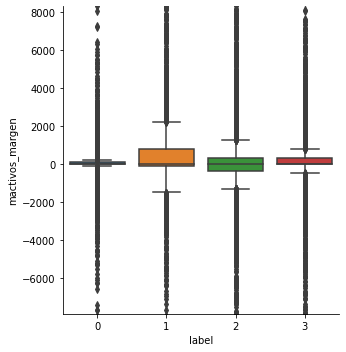

In [ ]:
c="mactivos_margen"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-7882.152240760246, 8281.483311450176)

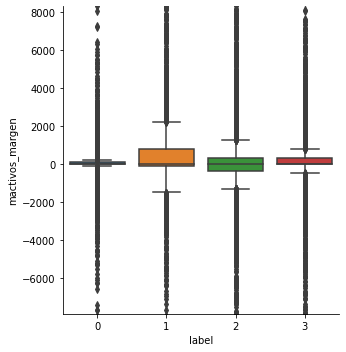

In [ ]:
c="mactivos_margen"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-7882.152240760246, 8281.483311450176)

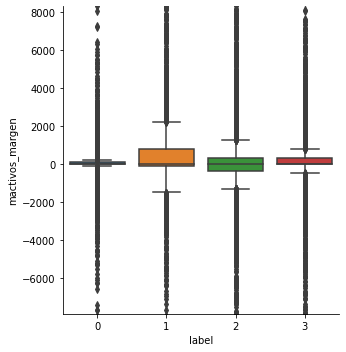

In [ ]:
c="mactivos_margen"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


(-7882.152240760246, 8281.483311450176)

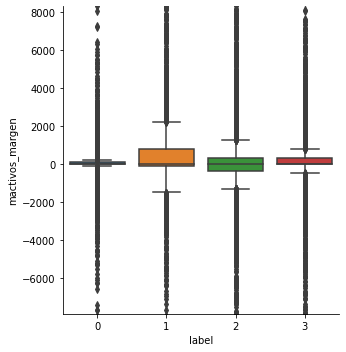

In [ ]:
c="mactivos_margen"

sns.catplot(data=Xbajas_clus, x="label", y=c, kind="box")
plt.ylim([Xbajas_clus[c].mean()-2*Xbajas_clus[c].std(), Xbajas_clus[c].mean()+2*Xbajas_clus[c].std()])


<AxesSubplot:xlabel='mrentabilidad', ylabel='Density'>

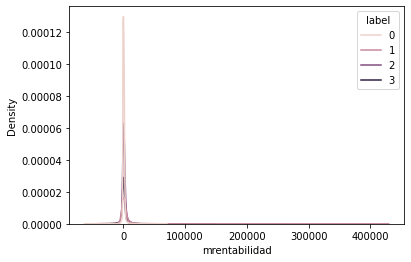

In [76]:
sns.kdeplot(data=Xbajas_clus, x="mrentabilidad", hue="label")

In [ ]:
for c in mas_import:

In [86]:
df.groupby("label").median()

,ctrx_quarter,cpayroll_trx,mtarjeta_visa_consumo,mcuentas_saldo,mpasivos_margen,mprestamos_personales,mpayroll,mactivos_margen,mcaja_ahorro,mtarjeta_master_consumo,ctarjeta_visa_transacciones,mtransferencias_recibidas,cproductos,cdescubierto_preacordado,mcuenta_debitos_automaticos,Visa_mpagominimo,mrentabilidad_annual,ccomisiones_mantenimiento,cliente_edad
label,,,,,,,,,,,,,,,,,,,
0.0,28.5,0.0,4655.120,10002.610,178.900,0.0,0.0,-321.100,4832.355,3968.185,6.5,0.00,5.5,0.5,0.0,586.500,2767.99,0.0,63.5
1.0,77.0,0.0,27703.575,20630.580,755.655,0.0,0.0,-936.395,26128.795,0.000,8.5,18772.51,6.5,0.5,0.0,3964.740,14653.54,0.5,59.5
2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3.0,13.5,0.0,10425.240,8.345,96.810,0.0,0.0,-273.690,8.345,946.275,5.0,0.00,6.5,1.0,0.0,615.825,10214.75,0.0,67.0
4.0,27.5,0.0,1501.440,19921.670,95.610,0.0,0.0,-329.295,20807.800,1543.090,1.0,7038.00,6.0,1.0,0.0,299.115,22596.91,0.5,55.5
5.0,6.0,0.0,0.000,-7052.350,0.000,0.0,0.0,6.850,0.000,0.000,0.0,0.00,6.0,1.0,0.0,82.110,10883.84,1.0,54.0


In [82]:
df.label.value_counts()

0.0    385
5.0    352
1.0    269
2.0    215
3.0    205
4.0     88
Name: label, dtype: int64

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


<AxesSubplot:xlabel='ctrx_quarter', ylabel='Density'>

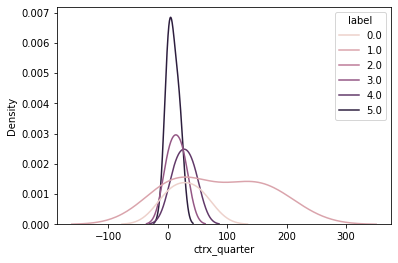

In [73]:
sns.kdeplot(data=df, x="ctrx_quarter", hue="label")